In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install regionmask
!pip install cf_xarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 120.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install rioxarray cartopy geopandas

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Wind potential offshore following RCP 8.5 and RCP 2.6

Mounted at /content/drive


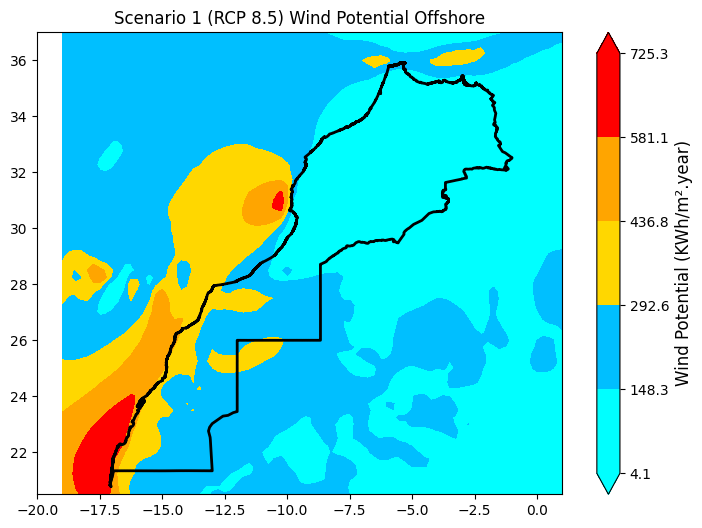

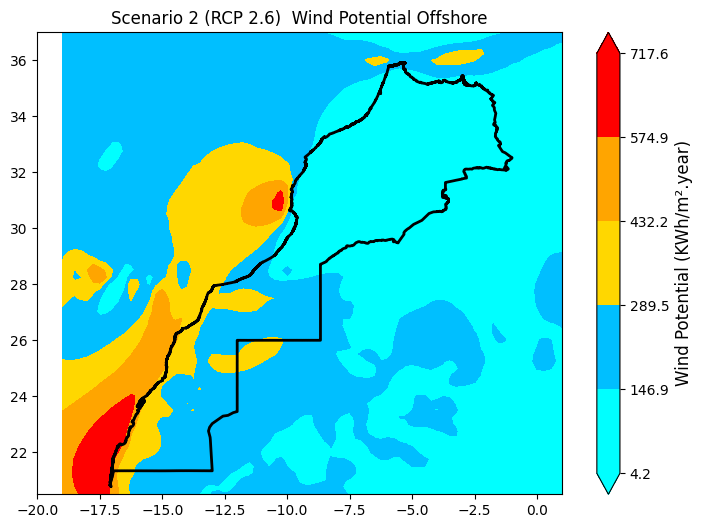

<ipython-input-1-fb0ba64c14e8>:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust the subplots to make room for the color bar


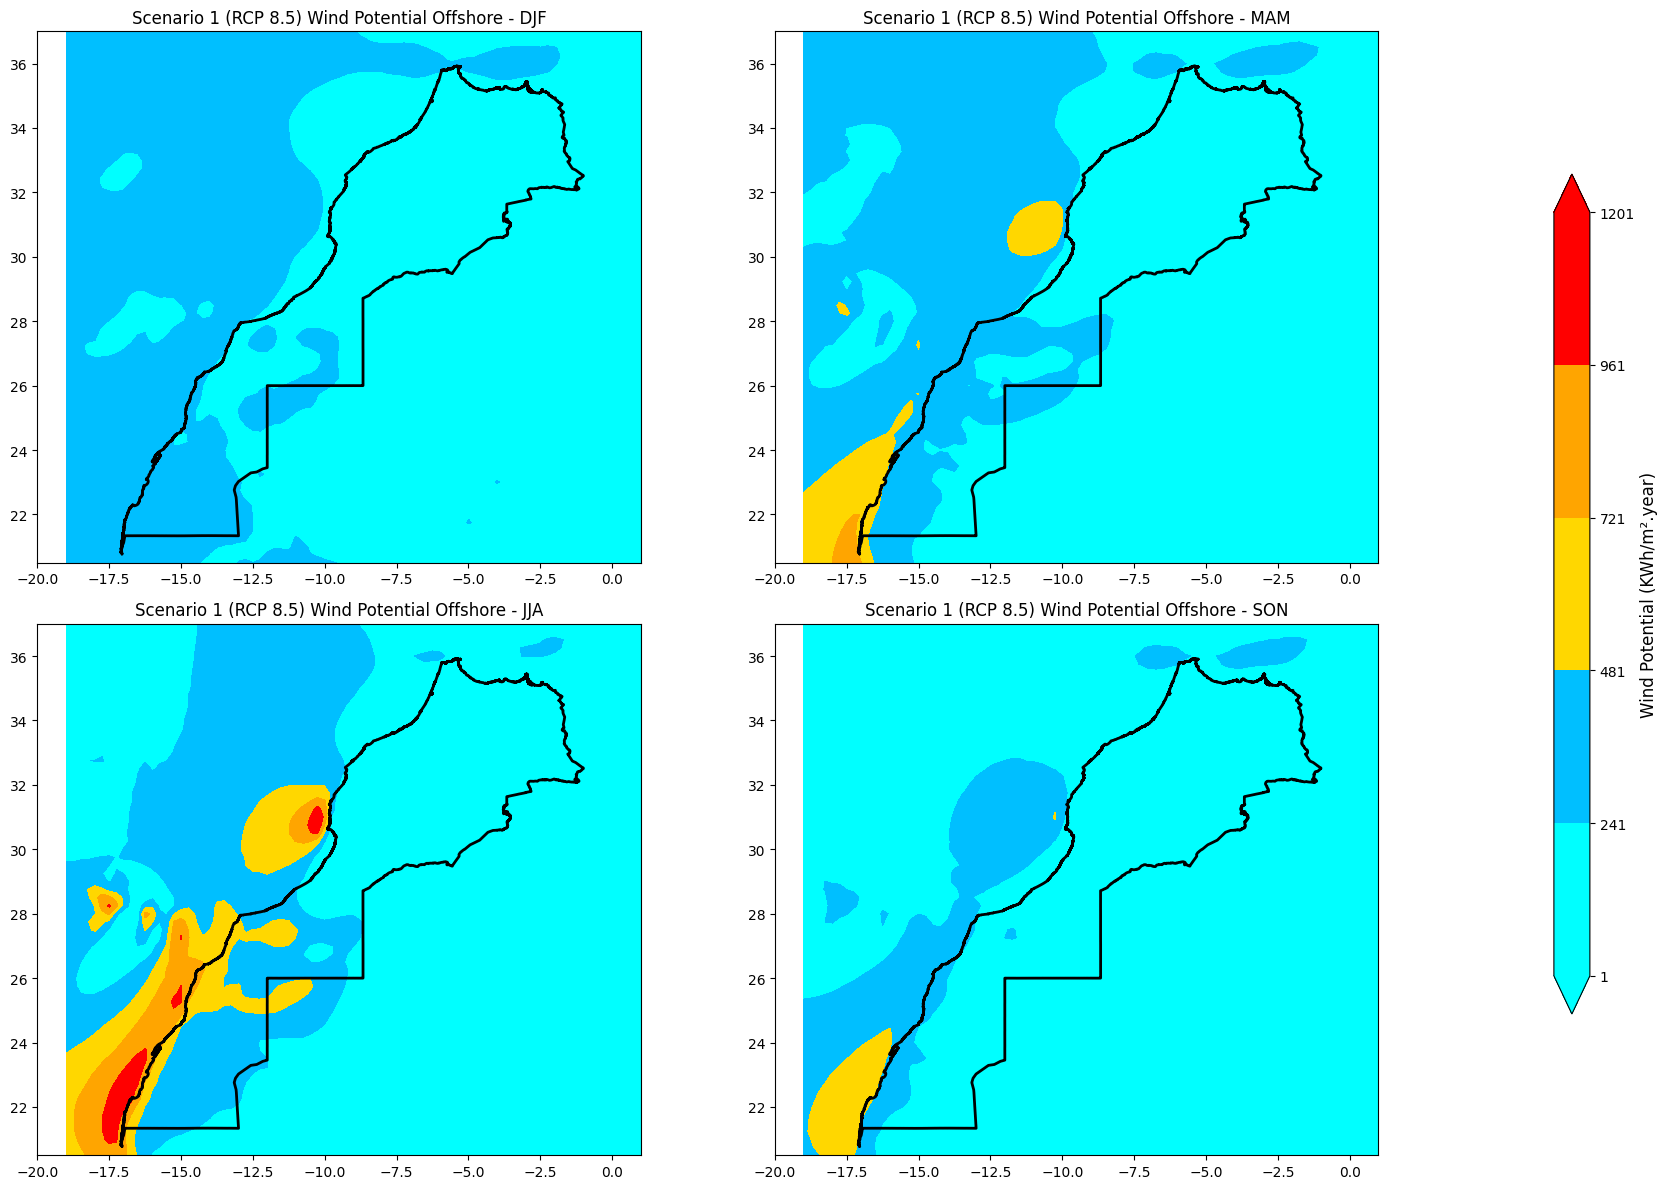

<ipython-input-1-fb0ba64c14e8>:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust the subplots to make room for the color bar


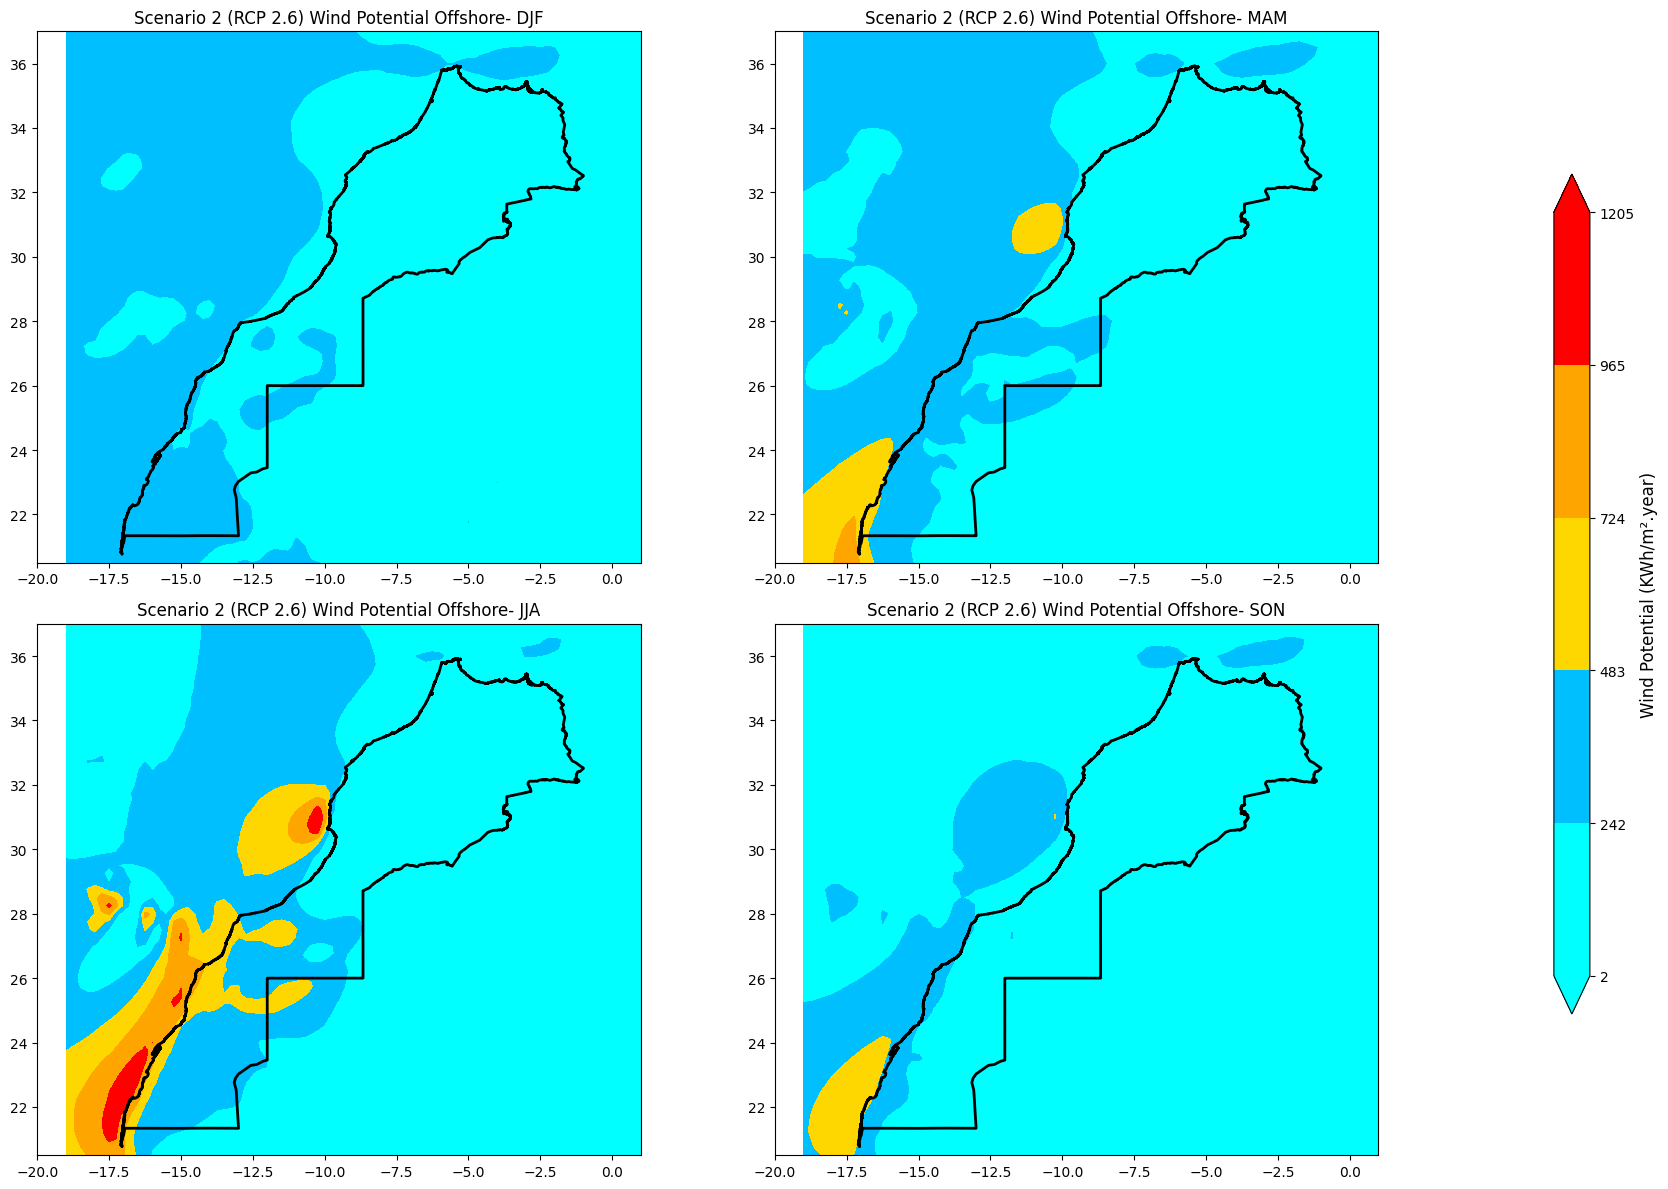

In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from google.colab import drive
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load shapefiles for Morocco
shapefile_path = "drive/MyDrive/data/maroc/"
morocco = gpd.read_file(shapefile_path, crs='EPSG:4326')


scenario1_corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_RCP85/BC_wspd100m_RCP85_.nc'
scenario2_corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_RCP26/BC_wspd100m_RCP26_.nc'

# Load datasets
scenario1_corrected_data_wind100 = xr.open_dataset(scenario1_corrected_file_wind100)
scenario2_corrected_data_wind100 = xr.open_dataset(scenario2_corrected_file_wind100)

# wind potential calculation function
def calculate_wind_potential(wind_speed):
    rho = 1.225
    return 0.5 * rho * wind_speed**3

# Calculate wind potential
scenario1_corrected_wind_potential = calculate_wind_potential(scenario1_corrected_data_wind100['ua100m'])
scenario2_corrected_wind_potential = calculate_wind_potential(scenario2_corrected_data_wind100['va100m'])

# Temporal mean
scenario1_corrected_mean_potential = scenario1_corrected_wind_potential.mean(dim='time')
scenario2_corrected_mean_potential = scenario2_corrected_wind_potential.mean(dim='time')

# Convert to 2D by selecting a specific layer
scenario1_corrected_mean_potential_2d = scenario1_corrected_mean_potential.squeeze()
scenario2_corrected_mean_potential_2d = scenario2_corrected_mean_potential.squeeze()


colors = ['cyan', 'deepskyblue', 'yellow', 'gold', 'orange', 'red']
cmap = ListedColormap(colors)

# Plot temporal means for corrected scenarios separately
plt.figure(figsize=(9, 6))
ax = plt.gca()
contour = ax.contourf(scenario1_corrected_mean_potential_2d['longitude'], scenario1_corrected_mean_potential_2d['latitude'],
                      scenario1_corrected_mean_potential_2d, levels=np.linspace(float(scenario1_corrected_mean_potential_2d.min()),
                      float(scenario1_corrected_mean_potential_2d.max()), len(colors)), cmap=cmap, extend='both')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
morocco.plot(ax=ax, color="none", edgecolor='black', linewidth=2)
plt.title('Scenario 1 (RCP 8.5) Wind Potential Offshore')
plt.xlim(-20, 1)
plt.ylim(20.5, 37)
plt.show()

plt.figure(figsize=(9, 6))
ax = plt.gca()
contour = ax.contourf(scenario2_corrected_mean_potential_2d['longitude'], scenario2_corrected_mean_potential_2d['latitude'],
                      scenario2_corrected_mean_potential_2d, levels=np.linspace(float(scenario2_corrected_mean_potential_2d.min()),
                      float(scenario2_corrected_mean_potential_2d.max()), len(colors)), cmap=cmap, extend='both')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
morocco.plot(ax=ax, color="none", edgecolor='black', linewidth=2)
plt.title('Scenario 2 (RCP 2.6)  Wind Potential Offshore')
plt.xlim(-20, 1)
plt.ylim(20.5, 37)
plt.show()

# Seasonal analysis
def calculate_seasonal_mean(data, season):
    return data.sel(time=data['time.season'] == season).mean(dim='time')


seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Calculate global min and max values for scenario 1
global_min1 = float('inf')
global_max1 = float('-inf')
for season in seasons:
    scenario1_corrected_seasonal_mean = calculate_seasonal_mean(scenario1_corrected_wind_potential, season).squeeze()
    global_min1 = min(global_min1, scenario1_corrected_seasonal_mean.min())
    global_max1 = max(global_max1, scenario1_corrected_seasonal_mean.max())

# Plot seasonal means for scenario 1 (4x4 plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for i, season in enumerate(seasons):
    scenario1_corrected_seasonal_mean = calculate_seasonal_mean(scenario1_corrected_wind_potential, season).squeeze()
    ax = axes[i//2, i%2]
    contour = ax.contourf(scenario1_corrected_seasonal_mean['longitude'], scenario1_corrected_seasonal_mean['latitude'],
                          scenario1_corrected_seasonal_mean, levels=np.linspace(global_min1, global_max1, len(colors)), cmap=cmap, extend='both')
    ax.set_title(f'Scenario 1 (RCP 8.5) Wind Potential Offshore - {season}')
    morocco.plot(ax=ax, color="none", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

# Create a new axis for the color bar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
cbar = fig.colorbar(contour, cax=cax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust the subplots to make room for the color bar
plt.show()

# Calculate global min and max values for scenario 2
global_min2 = float('inf')
global_max2 = float('-inf')
for season in seasons:
    scenario2_corrected_seasonal_mean = calculate_seasonal_mean(scenario2_corrected_wind_potential, season).squeeze()
    global_min2 = min(global_min2, scenario2_corrected_seasonal_mean.min())
    global_max2 = max(global_max2, scenario2_corrected_seasonal_mean.max())

# Plot seasonal means for scenario 2 (4x4 plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for i, season in enumerate(seasons):
    scenario2_corrected_seasonal_mean = calculate_seasonal_mean(scenario2_corrected_wind_potential, season).squeeze()
    ax = axes[i//2, i%2]
    contour = ax.contourf(scenario2_corrected_seasonal_mean['longitude'], scenario2_corrected_seasonal_mean['latitude'],
                          scenario2_corrected_seasonal_mean, levels=np.linspace(global_min2, global_max2, len(colors)), cmap=cmap, extend='both')
    ax.set_title(f'Scenario 2 (RCP 2.6) Wind Potential Offshore- {season}')
    morocco.plot(ax=ax, color="none", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

# Create a new axis for the color bar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(contour, cax=cax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Wind potential Onshore following RCP 8.5 and RCP 2.6

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


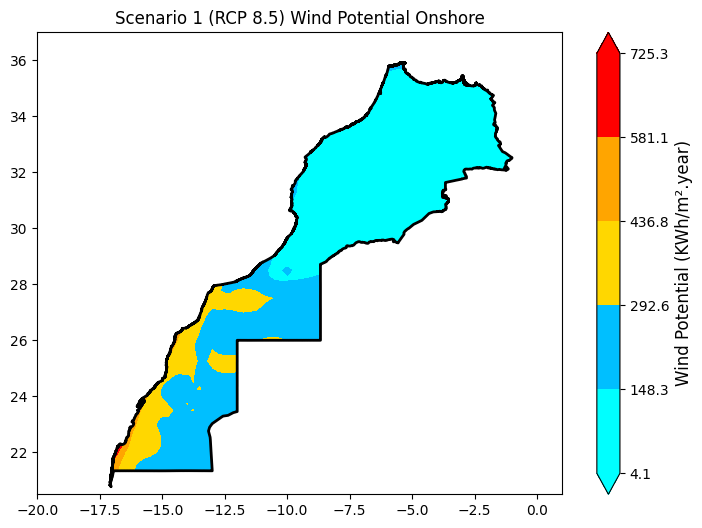

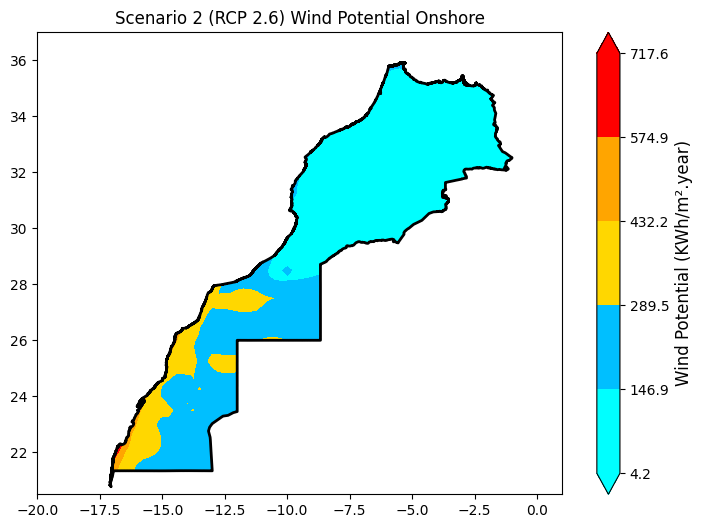

<ipython-input-2-8b28dadf591f>:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust the subplots to make room for the color bar


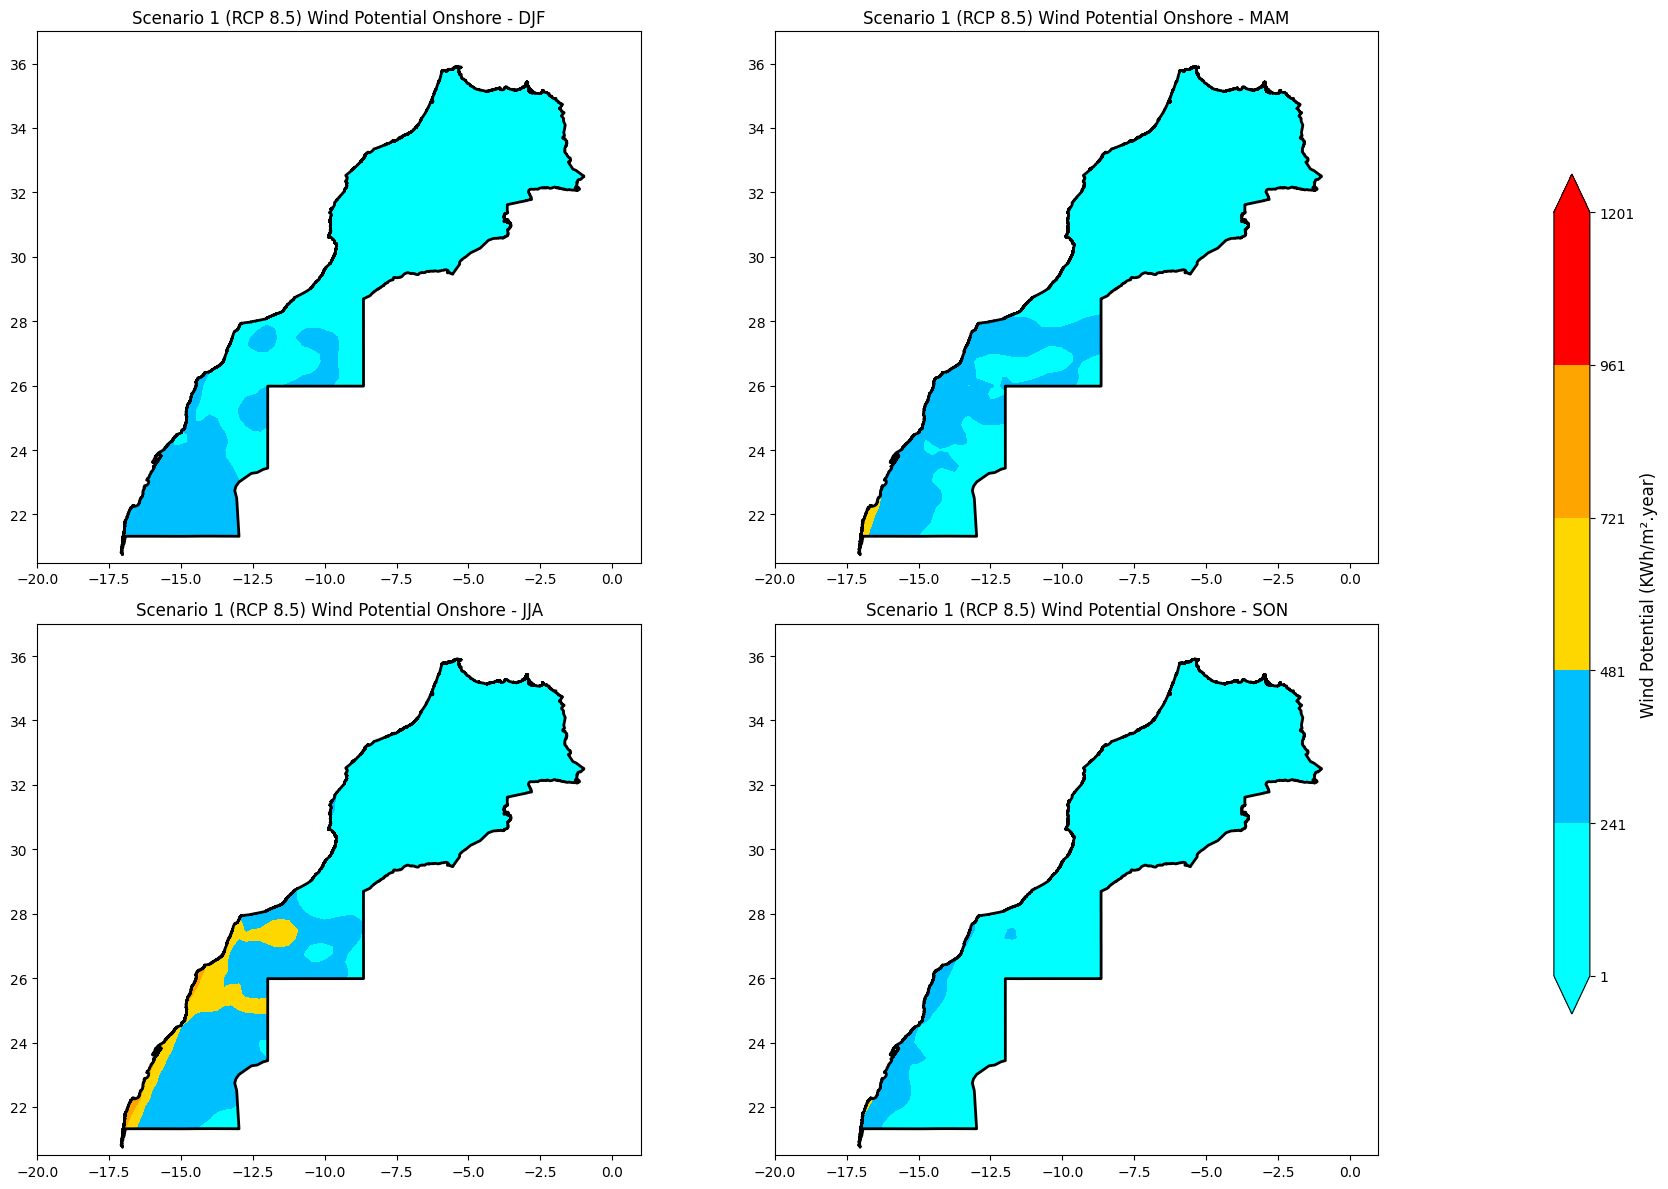

<ipython-input-2-8b28dadf591f>:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust the subplots to make room for the color bar


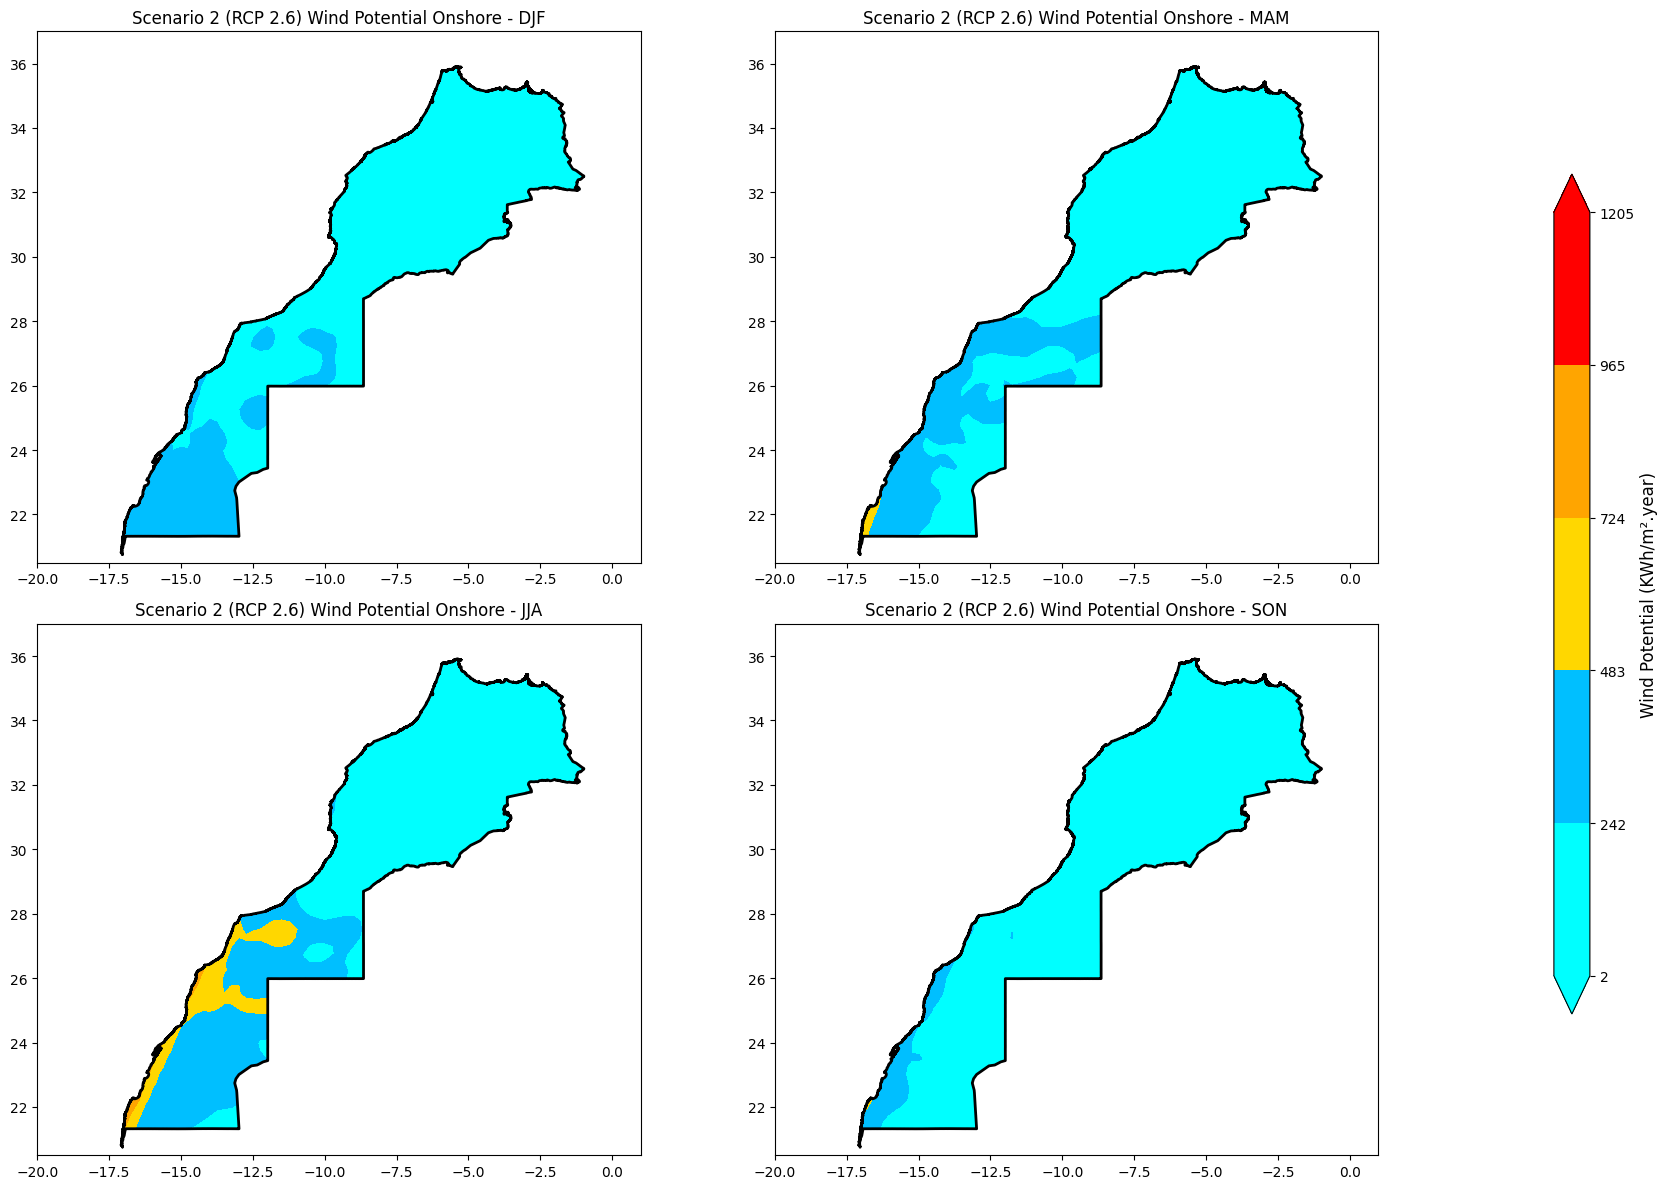

In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from google.colab import drive
from mpl_toolkits.axes_grid1 import make_axes_locatable


shapefile_path = "drive/MyDrive/data/maroc/"
morocco = gpd.read_file(shapefile_path, crs='EPSG:4326')

scenario1_corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_RCP85/BC_wspd100m_RCP85_.nc'
scenario2_corrected_file_wind100 = '/content/drive/MyDrive/data/new/BC_RCP26/BC_wspd100m_RCP26_.nc'


scenario1_corrected_data_wind100 = xr.open_dataset(scenario1_corrected_file_wind100)
scenario2_corrected_data_wind100 = xr.open_dataset(scenario2_corrected_file_wind100)

# wind potential calculation function
def calculate_wind_potential(wind_speed):
    rho = 1.225
    return 0.5 * rho * wind_speed**3

# Calculate wind potential
scenario1_corrected_wind_potential = calculate_wind_potential(scenario1_corrected_data_wind100['ua100m'])
scenario2_corrected_wind_potential = calculate_wind_potential(scenario2_corrected_data_wind100['va100m'])

# Temporal mean
scenario1_corrected_mean_potential = scenario1_corrected_wind_potential.mean(dim='time')
scenario2_corrected_mean_potential = scenario2_corrected_wind_potential.mean(dim='time')

# Convert to 2D by selecting a specific layer
scenario1_corrected_mean_potential_2d = scenario1_corrected_mean_potential.squeeze()
scenario2_corrected_mean_potential_2d = scenario2_corrected_mean_potential.squeeze()


colors = ['cyan', 'deepskyblue', 'yellow', 'gold', 'orange', 'red']
cmap = ListedColormap(colors)

# Plot temporal means for corrected scenarios
plt.figure(figsize=(9, 6))
ax = plt.gca()
contour = ax.contourf(scenario1_corrected_mean_potential_2d['longitude'], scenario1_corrected_mean_potential_2d['latitude'],
                      scenario1_corrected_mean_potential_2d, levels=np.linspace(float(scenario1_corrected_mean_potential_2d.min()),
                      float(scenario1_corrected_mean_potential_2d.max()), len(colors)), cmap=cmap, extend='both')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
plt.title('Scenario 1 (RCP 8.5) Wind Potential Onshore')
plt.xlim(-20, 1)
plt.ylim(20.5, 37)
plt.show()

plt.figure(figsize=(9, 6))
ax = plt.gca()
contour = ax.contourf(scenario2_corrected_mean_potential_2d['longitude'], scenario2_corrected_mean_potential_2d['latitude'],
                      scenario2_corrected_mean_potential_2d, levels=np.linspace(float(scenario2_corrected_mean_potential_2d.min()),
                      float(scenario2_corrected_mean_potential_2d.max()), len(colors)), cmap=cmap, extend='both')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
plt.title('Scenario 2 (RCP 2.6) Wind Potential Onshore')
plt.xlim(-20, 1)
plt.ylim(20.5, 37)
plt.show()

# Seasonal analysis
def calculate_seasonal_mean(data, season):
    return data.sel(time=data['time.season'] == season).mean(dim='time')

seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Calculate global min and max values for scenario 1
global_min1 = float('inf')
global_max1 = float('-inf')
for season in seasons:
    scenario1_corrected_seasonal_mean = calculate_seasonal_mean(scenario1_corrected_wind_potential, season).squeeze()
    global_min1 = min(global_min1, scenario1_corrected_seasonal_mean.min())
    global_max1 = max(global_max1, scenario1_corrected_seasonal_mean.max())

# Plot seasonal means for scenario 1 (4x4 plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for i, season in enumerate(seasons):
    scenario1_corrected_seasonal_mean = calculate_seasonal_mean(scenario1_corrected_wind_potential, season).squeeze()
    ax = axes[i//2, i%2]
    contour = ax.contourf(scenario1_corrected_seasonal_mean['longitude'], scenario1_corrected_seasonal_mean['latitude'],
                          scenario1_corrected_seasonal_mean, levels=np.linspace(global_min1, global_max1, len(colors)), cmap=cmap, extend='both')
    ax.set_title(f'Scenario 1 (RCP 8.5) Wind Potential Onshore - {season}')
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)


cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(contour, cax=cax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Calculate global min and max values for scenario 2
global_min2 = float('inf')
global_max2 = float('-inf')
for season in seasons:
    scenario2_corrected_seasonal_mean = calculate_seasonal_mean(scenario2_corrected_wind_potential, season).squeeze()
    global_min2 = min(global_min2, scenario2_corrected_seasonal_mean.min())
    global_max2 = max(global_max2, scenario2_corrected_seasonal_mean.max())

# Plot seasonal means for scenario 2 (4x4 plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for i, season in enumerate(seasons):
    scenario2_corrected_seasonal_mean = calculate_seasonal_mean(scenario2_corrected_wind_potential, season).squeeze()
    ax = axes[i//2, i%2]
    contour = ax.contourf(scenario2_corrected_seasonal_mean['longitude'], scenario2_corrected_seasonal_mean['latitude'],
                          scenario2_corrected_seasonal_mean, levels=np.linspace(global_min2, global_max2, len(colors)), cmap=cmap, extend='both')
    ax.set_title(f'Scenario 2 (RCP 2.6) Wind Potential Onshore - {season}')
    morocco.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

# Create a new axis for the color bar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(contour, cax=cax)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Solar potential following RCP 8.5 and RCP 2.6


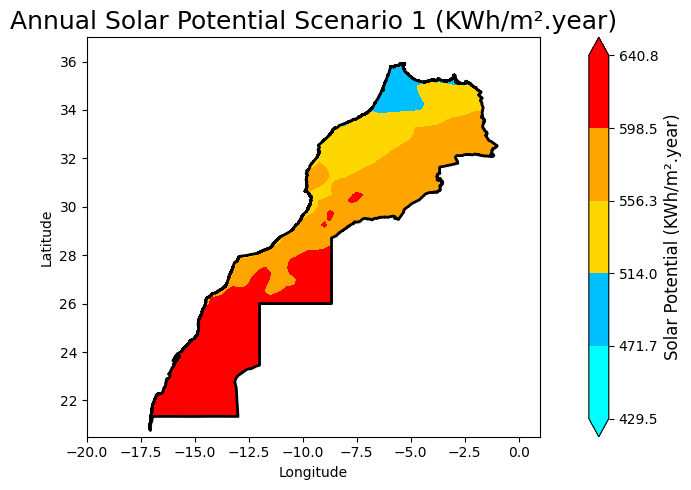

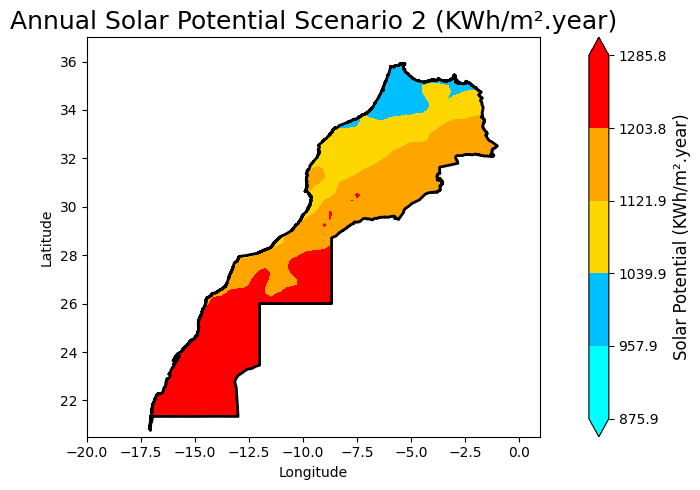

<ipython-input-8-500626147780>:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


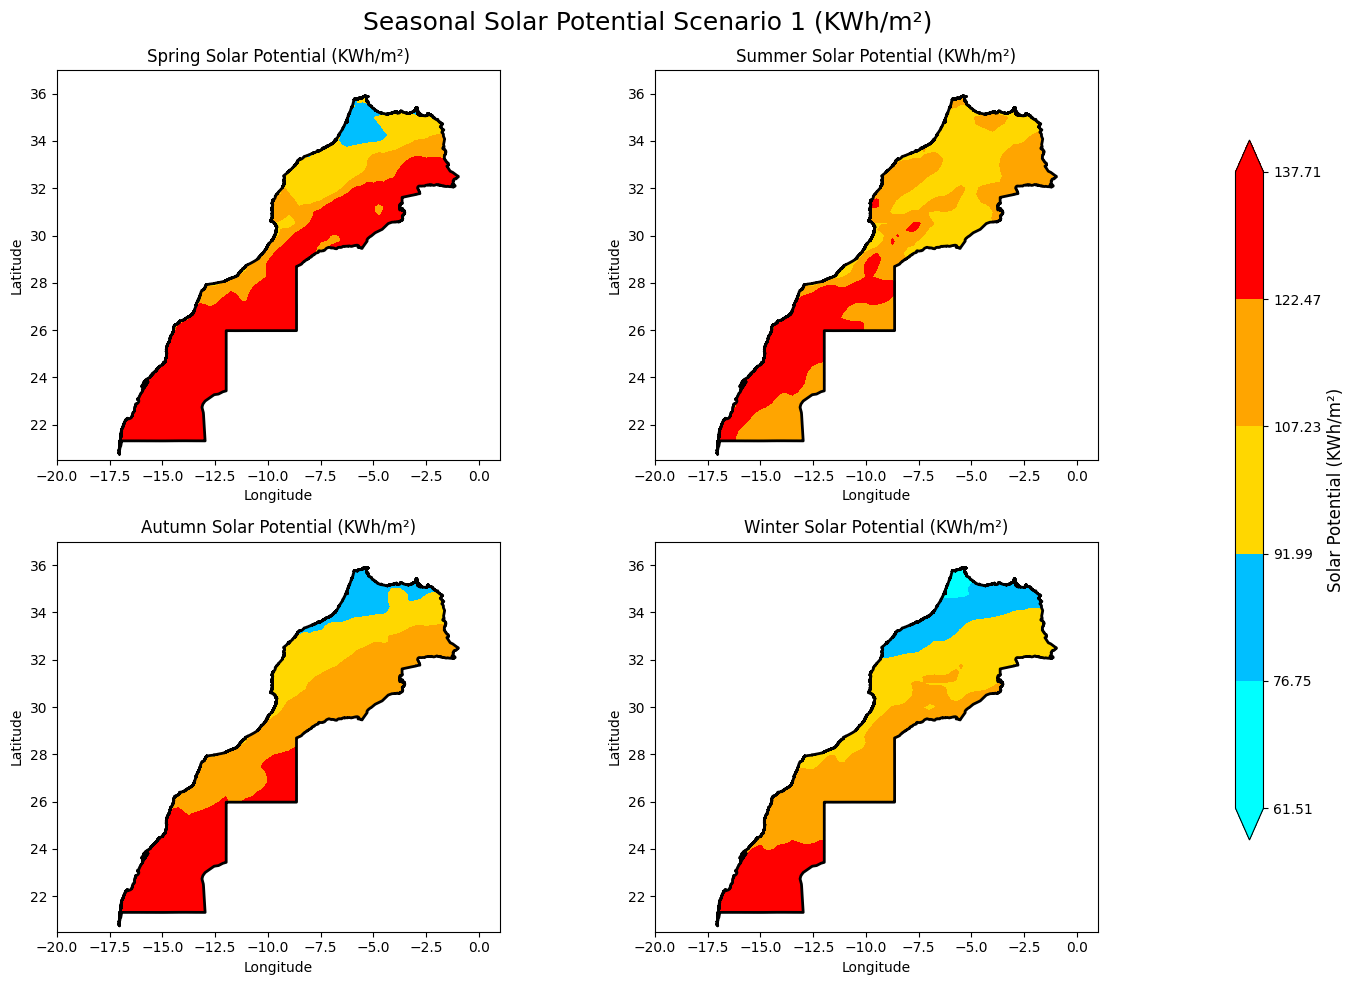

<ipython-input-8-500626147780>:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


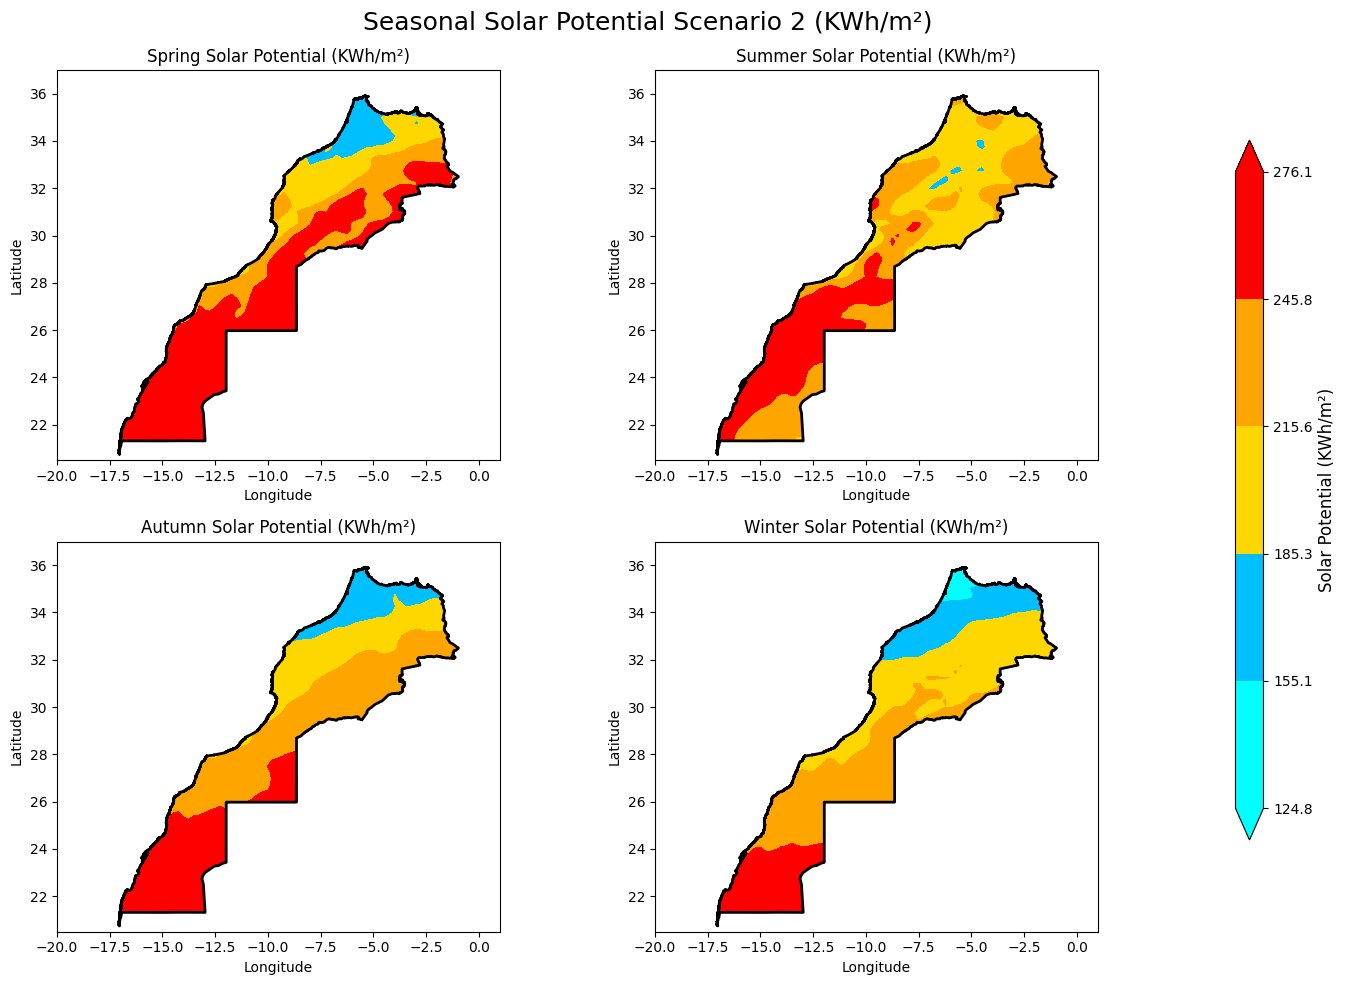

In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Solar potential calculation function
def P_sol(I, W, T_a):
    eta_panel = 0.17
    gamma = -0.005
    IS = I  # Convert to kWh
    h = 24  # hours in a day
    PR = 0.85
    Ai = 1
    ai = 1
    eta_LPV = 0.47
    T_stc = 25  # Celsius
    Ti = 4.3 + 0.943 * (T_a - 273.15) + 0.028 * (IS) / (3.6*30 * (10**3)) - 1.528 * W
    eta_PV = eta_panel * (1 + gamma * (Ti - T_stc))

    return (IS * h * Ai * ai * eta_LPV * eta_PV * PR) / (3.6*30* (10**6))  # Convert to KWh

# Load future scenario data
scenario1_irr = xr.open_dataset("/content/drive/MyDrive/data/BC_data/BC_RCP85/BC_Rad_RCP85_.nc")['rsds']
scenario1_temp = xr.open_dataset("/content/drive/MyDrive/data/BC_data/BC_RCP85/BC_T2m_RCP85_.nc")['tas']
scenario1_wind = xr.open_dataset("/content/drive/MyDrive/data/BC_data/BC_RCP85/BC_wspd10m_RCP85_.nc")['sfcWind']

scenario2_irr = xr.open_dataset("/content/drive/MyDrive/data/BC_data/BC_RCP26/BC_Rad_RCP26_.nc")['rsds']
scenario2_temp = xr.open_dataset("/content/drive/MyDrive/data/BC_data/BC_RCP26/BC_T2m_RCP26_.nc")['tas']
scenario2_wind = xr.open_dataset("/content/drive/MyDrive/data/BC_data/BC_RCP26/BC_wspd10m_RCP26_.nc")['sfcWind']

# Time slicing : from 2024-12-16 to 2099-12-16
time_slice = slice('2024-12-16', '2099-12-16')
scenario1_irr = scenario1_irr.sel(time=time_slice)
scenario1_temp = scenario1_temp.sel(time=time_slice)
scenario1_wind = scenario1_wind.sel(time=time_slice)

scenario2_irr = scenario2_irr.sel(time=time_slice)
scenario2_temp = scenario2_temp.sel(time=time_slice)
scenario2_wind = scenario2_wind.sel(time=time_slice)

# Calculate interannual solar potential for each scenario
annual_potential_scenario1 = P_sol(scenario1_irr, scenario1_wind, scenario1_temp).sum(dim='time')
annual_potential_scenario2 = P_sol(scenario2_irr, scenario2_wind, scenario2_temp).sum(dim='time')

# Plotting interannual solar potential for each scenario
def plot_annual_potential(potential, title):

    colors = ['cyan', 'deepskyblue', 'yellow', 'gold', 'orange', 'red']
    cmap = ListedColormap(colors)

    shapefile_path = "drive/MyDrive/data/maroc/"
    maroc = gpd.read_file(shapefile_path, crs='EPSG:4326')

    # Create plot with contourf
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    contour = ax.contourf(potential['longitude'], potential['latitude'], potential,
                          levels=np.linspace(potential.min(), potential.max(), len(colors)),
                          cmap=cmap, extend='both')

    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Solar Potential (KWh/m².year)', fontsize=12)


    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # overlay shapefile
    maroc.plot(ax=ax, color="white", edgecolor='black', linewidth=2)
    ax.set_xlim(-20, 1)
    ax.set_ylim(20.5, 37)

    plt.tight_layout()
    plt.show()

plot_annual_potential(annual_potential_scenario1, "Annual Solar Potential Scenario 1 (KWh/m².year)")
plot_annual_potential(annual_potential_scenario2, "Annual Solar Potential Scenario 2 (KWh/m².year)")

# Calculate seasonal solar potential for each scenario
def calculate_seasonal_potential(irr, temp, wind):


    seasons = {
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Autumn': [9, 10, 11],
        'Winter': [12, 1, 2]
    }

    seasonal_potentials = {}
    for season, months in seasons.items():
        seasonal_irr = irr.where(irr['time.month'].isin(months), drop=True)
        seasonal_temp = temp.where(temp['time.month'].isin(months), drop=True)
        seasonal_wind = wind.where(wind['time.month'].isin(months), drop=True)

        potential = P_sol(seasonal_irr, seasonal_wind, seasonal_temp).sum(dim='time')
        seasonal_potentials[season] = potential
    return seasonal_potentials

seasonal_potential_scenario1 = calculate_seasonal_potential(scenario1_irr, scenario1_temp, scenario1_wind)
seasonal_potential_scenario2 = calculate_seasonal_potential(scenario2_irr, scenario2_temp, scenario2_wind)

# Plotting seasonal solar potential for each scenario
def plot_seasonal_potential(seasonal_potentials, title):

    colors = ['cyan', 'deepskyblue', 'yellow', 'gold', 'orange', 'red']
    cmap = ListedColormap(colors)

    shapefile_path = "drive/MyDrive/data/maroc/"
    maroc = gpd.read_file(shapefile_path, crs='EPSG:4326')

    # Create a 2x2 plot grid
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.ravel()

    for i, (season, potential) in enumerate(seasonal_potentials.items()):
        contour = axs[i].contourf(potential['longitude'], potential['latitude'], potential,
                                  levels=np.linspace(potential.min(), potential.max(), len(colors)),
                                  cmap=cmap, extend='both')
        axs[i].set_title(f"{season} Solar Potential (KWh/m²)")
        axs[i].set_xlabel('Longitude')
        axs[i].set_ylabel('Latitude')
        maroc.plot(ax=axs[i], color="white", edgecolor='black', linewidth=2)
        axs[i].set_xlim(-20, 1)
        axs[i].set_ylim(20.5, 37)

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(contour, cax=cbar_ax, orientation='vertical')
    cbar.set_label('Solar Potential (KWh/m²)', fontsize=12)

    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.subplots_adjust(top=0.92)
    fig.suptitle(title, fontsize=18)
    plt.show()

plot_seasonal_potential(seasonal_potential_scenario1, "Seasonal Solar Potential Scenario 1 (KWh/m²)")
plot_seasonal_potential(seasonal_potential_scenario2, "Seasonal Solar Potential Scenario 2 (KWh/m²)")
